# *Nail it!* player logs analysis

## 1- Loading and cleaning

In [217]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [218]:
from pathlib import Path

df = pd.DataFrame()
for log in Path("./assets/logs/").iterdir():
    if log.is_file():
        if log.suffix == ".csv":
            log_df = pd.read_csv(log, sep=',').drop(0).drop(columns=["party"])
            log_df.insert(0, "player", log.stem)
            df = pd.concat([df, log_df], axis=0)

df = df.sort_values("score", ascending=False).reset_index(drop=True)
df.head()

,player,score,accuracy,total_nails,missed,time,date
0,stanley,244.8,84.9,116,9,144.16,15 Nov 2024 13:11:10
1,tim,110.0,76.3,64,6,72.08,15 Nov 2024 12:52:58
2,stanley,102.8,81.5,59,6,63.08,14 Nov 2024 19:11:59
3,louisyoupi,97.7,80.0,50,2,61.05,15 Nov 2024 13:05:15
4,test,90.7,79.3,50,4,57.16,14 Nov 2024 19:46:24


## 2- Ploting data

### Top 5 player score

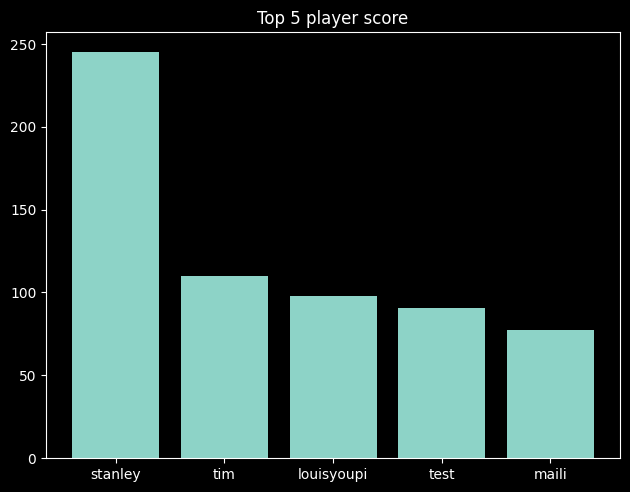

In [219]:
max_scores = df.groupby("player").agg({'score': 'max', 'accuracy': 'mean'}).reset_index().sort_values("score", ascending=False).head(5)

plt.bar(max_scores['player'], max_scores['score'])
plt.tight_layout()
plt.title('Top 5 player score')
plt.show()

### Top 5 player ratio

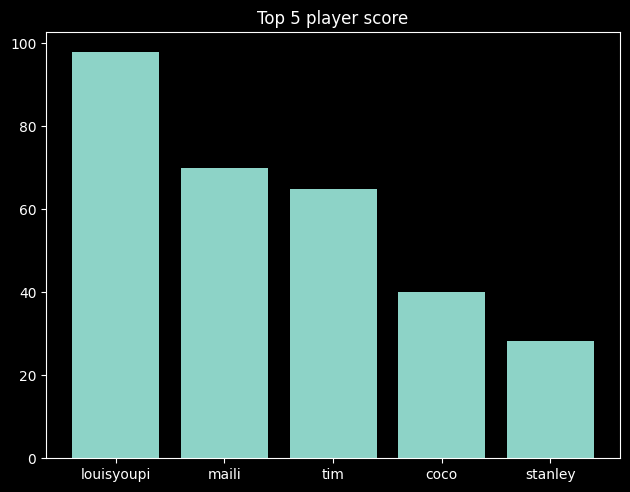

In [220]:
ratio = df.groupby("player").agg({'score': 'sum', 'player': 'count'}).rename(columns={'player':'party_count'})
ratio = (ratio["score"] / ratio["party_count"])

ratio = ratio.sort_values(ascending=False)[:5]

plt.bar(ratio.index, ratio.values)
plt.tight_layout()
plt.title('Top 5 player score')
plt.show()


### High score vs number of parties

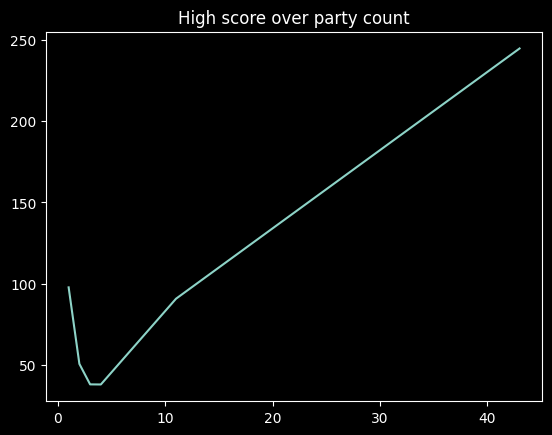

In [221]:
max_scores = df.groupby("player")["score"].max()
player_counts = df["player"].value_counts()
result = pd.DataFrame({
    "max_score": max_scores,
    "appearance_count": player_counts
}).groupby("appearance_count").mean().sort_index(ascending=False)

plt.plot(result)
plt.title('High score over party count')
plt.show()

### Player specific progression over time

You can select a player by entering his name

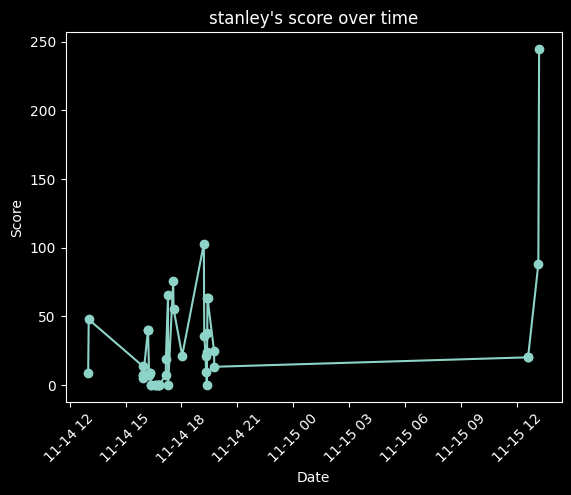

In [222]:
player_name = "stanley"

player_df = df[df["player"] == player_name]
player_df.loc[:, 'date'] = pd.to_datetime(player_df['date'])
player_df = player_df.sort_values('date')

plt.plot(player_df['date'], player_df['score'], marker='o')
plt.title(f"{player_name}'s score over time")
plt.xlabel('Date')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

### Game duration distribution

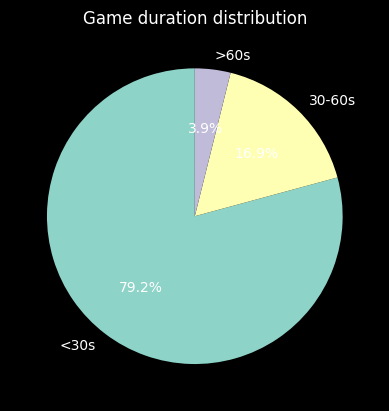

In [223]:
time_bins = [0, 30, 60, 120]  # Adjust based on your data
time_labels = ['<30s', '30-60s', '>60s']
time_ranges = pd.cut(df['time'], bins=time_bins, labels=time_labels)

# Count of games in each time range
time_counts = time_ranges.value_counts()
time_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Game duration distribution')
plt.ylabel('')
plt.show()


### Accuracy ranges

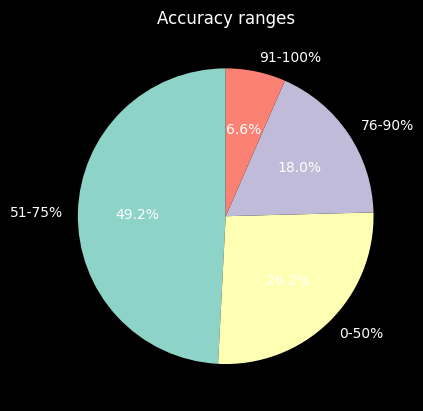

In [224]:
accuracy_bins = [0, 50, 75, 90, 100]
accuracy_labels = ['0-50%', '51-75%', '76-90%', '91-100%']
accuracy_range = pd.cut(df['accuracy'], bins=accuracy_bins, labels=accuracy_labels)

# Count of games in each accuracy range
accuracy_counts = accuracy_range.value_counts()
accuracy_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Accuracy ranges')
plt.ylabel('')
plt.show()

### Correlation matrix

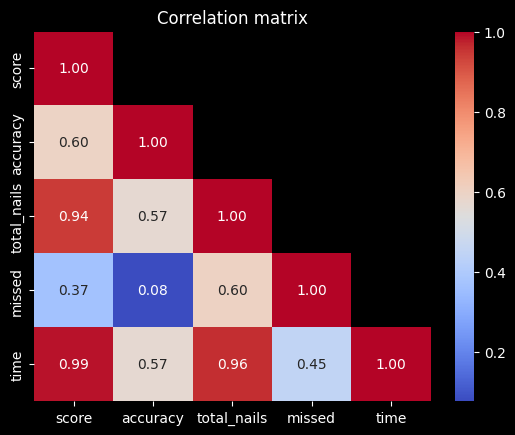

In [225]:
import seaborn as sns
import numpy as np

corr = df.drop(columns=["date", "player"]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()